In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
print(df.head())
print(df.shape)


         0                                                  1    2    3
1  9/17/23                     2:20 PM - +91 96000 29515: 🙏🙏🙏  NaN  NaN
2  9/17/23   2:20 PM - +91 96000 29515: Many more happy re...  NaN  NaN
3  9/17/23   2:21 PM - +91 63697 77039: Happy Birthday Ani...  NaN  NaN
4  9/17/23           2:23 PM - +91 90429 04253: Thank you sir  NaN  NaN
5  9/17/23   2:23 PM - Kumar IT Vcare: Many more happy ret...  NaN  NaN
(6849, 4)


In [5]:
import pandas as pd

# Read file into a list of lines
with open("office_group.txt", "r", encoding="utf8") as file:
    lines = file.readlines()

# Convert lines into a DataFrame
df = pd.DataFrame(lines, columns=["Raw"])

# Display the first few lines to understand the structure
print(df.head(10))



                                                 Raw
0  9/17/23, 2:08 PM - Messages and calls are end-...
1          9/17/23, 2:20 PM - +91 96000 29515: 🙏🙏🙏\n
2  9/17/23, 2:20 PM - +91 96000 29515: Many more ...
3  9/17/23, 2:21 PM - +91 63697 77039: Happy Birt...
4  9/17/23, 2:23 PM - +91 90429 04253: Thank you ...
5  9/17/23, 2:23 PM - Kumar IT Vcare: Many more h...
6  9/17/23, 2:23 PM - +91 90809 31540: Happy Birt...
7  9/17/23, 2:23 PM - +91 90429 04253: Thank you ...
8  9/17/23, 2:23 PM - +91 90429 04253: Thank you ...
9  9/17/23, 2:23 PM - +91 90429 04253: This messa...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7155 entries, 0 to 7154
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Raw     7155 non-null   object
dtypes: object(1)
memory usage: 56.0+ KB


In [8]:
print(df.columns)


Index(['Raw'], dtype='object')


In [9]:
print(df.head(10))


                                                 Raw
0  9/17/23, 2:08 PM - Messages and calls are end-...
1          9/17/23, 2:20 PM - +91 96000 29515: 🙏🙏🙏\n
2  9/17/23, 2:20 PM - +91 96000 29515: Many more ...
3  9/17/23, 2:21 PM - +91 63697 77039: Happy Birt...
4  9/17/23, 2:23 PM - +91 90429 04253: Thank you ...
5  9/17/23, 2:23 PM - Kumar IT Vcare: Many more h...
6  9/17/23, 2:23 PM - +91 90809 31540: Happy Birt...
7  9/17/23, 2:23 PM - +91 90429 04253: Thank you ...
8  9/17/23, 2:23 PM - +91 90429 04253: Thank you ...
9  9/17/23, 2:23 PM - +91 90429 04253: This messa...


In [10]:
import pandas as pd
import re

# Read the file line by line
with open("office_group.txt", "r", encoding="utf8") as file:
    lines = file.readlines()

# Use regex to extract Date, Time, Sender, and Message
data = []
pattern = r"(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}\s?(?:AM|PM)?) - (.+?): (.+)"

for line in lines:
    match = re.match(pattern, line)
    if match:
        date, time, sender, message = match.groups()
        data.append([date, time, sender, message])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Date", "Time", "Sender", "Chat"])

# Check structure
print(df.head())


      Date     Time           Sender  \
0  9/17/23  2:20 PM  +91 96000 29515   
1  9/17/23  2:20 PM  +91 96000 29515   
2  9/17/23  2:21 PM  +91 63697 77039   
3  9/17/23  2:23 PM  +91 90429 04253   
4  9/17/23  2:23 PM   Kumar IT Vcare   

                                               Chat  
0                                               🙏🙏🙏  
1       Many more happy returns of the day Anil 💐💐💐  
2                           Happy Birthday Anil 🥳🎉🥰  
3                                     Thank you sir  
4  Many more happy returns of the day Anil 💐💐💐💐🎂🎂🎂🎂  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


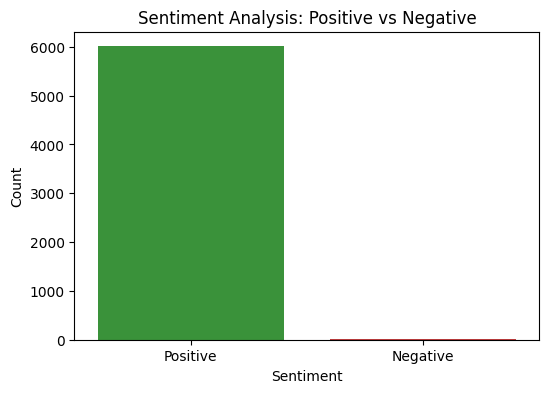

In [11]:
# Sentiment Analysis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

def sentimentalAnalysis(data, columnname):
    sid = SentimentIntensityAnalyzer()
    data.dropna(inplace=True)
    data['scores'] = data[columnname].apply(lambda text: sid.polarity_scores(text))
    data['compound'] = data['scores'].apply(lambda score: score['compound'])
    data['Negative'] = data['scores'].apply(lambda score: score['neg'])
    data['Positive'] = data['scores'].apply(lambda score: score['pos'])
    data['Neutral'] = data['scores'].apply(lambda score: score['neu'])
    data['Sentiment'] = data['compound'].apply(lambda c: 'Positive' if c >= 0 else 'Negative')
    posneg = pd.DataFrame(data['Sentiment'].value_counts())
    return posneg, data

pos, data_Senti = sentimentalAnalysis(df, columnname='Chat')

plt.figure(figsize=(6, 4))
sns.barplot(x=pos.index, y=pos['count'], palette=['#2ca02c', '#d62728'])
plt.title('Sentiment Analysis: Positive vs Negative')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


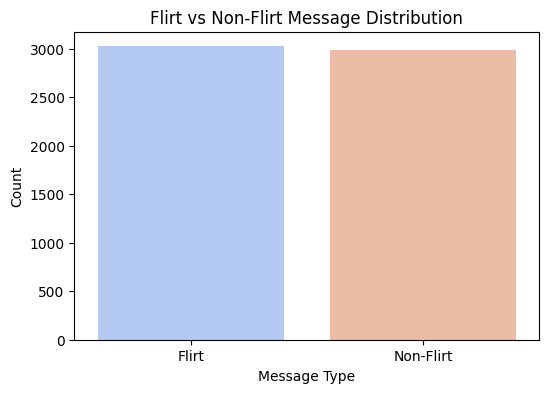

In [28]:
def classify_flirt_messages(data, columnname):
    sid = SentimentIntensityAnalyzer()
    data['Scores'] = data[columnname].apply(lambda text: sid.polarity_scores(text))
    data['Compound'] = data['Scores'].apply(lambda score: score['compound'])
    data['MessageType'] = data['Compound'].apply(lambda score: 'Flirt' if score > 0.5 else 'Non-Flirt')
    return data, data['MessageType'].value_counts()

data, Message_type = classify_flirt_messages(df, columnname='Message')

plt.figure(figsize=(6, 4))
sns.barplot(x=Message_type.index, y=Message_type.values, palette='coolwarm')
plt.title('Flirt vs Non-Flirt Message Distribution')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

# Talkative Analysis

      Date     Time           Sender  \
0  9/17/23  2:20 PM  +91 96000 29515   
1  9/17/23  2:20 PM  +91 96000 29515   
2  9/17/23  2:21 PM  +91 63697 77039   
3  9/17/23  2:23 PM  +91 90429 04253   
4  9/17/23  2:23 PM   Kumar IT Vcare   

                                            Message  
0                                               🙏🙏🙏  
1       Many more happy returns of the day Anil 💐💐💐  
2                           Happy Birthday Anil 🥳🎉🥰  
3                                     Thank you sir  
4  Many more happy returns of the day Anil 💐💐💐💐🎂🎂🎂🎂  


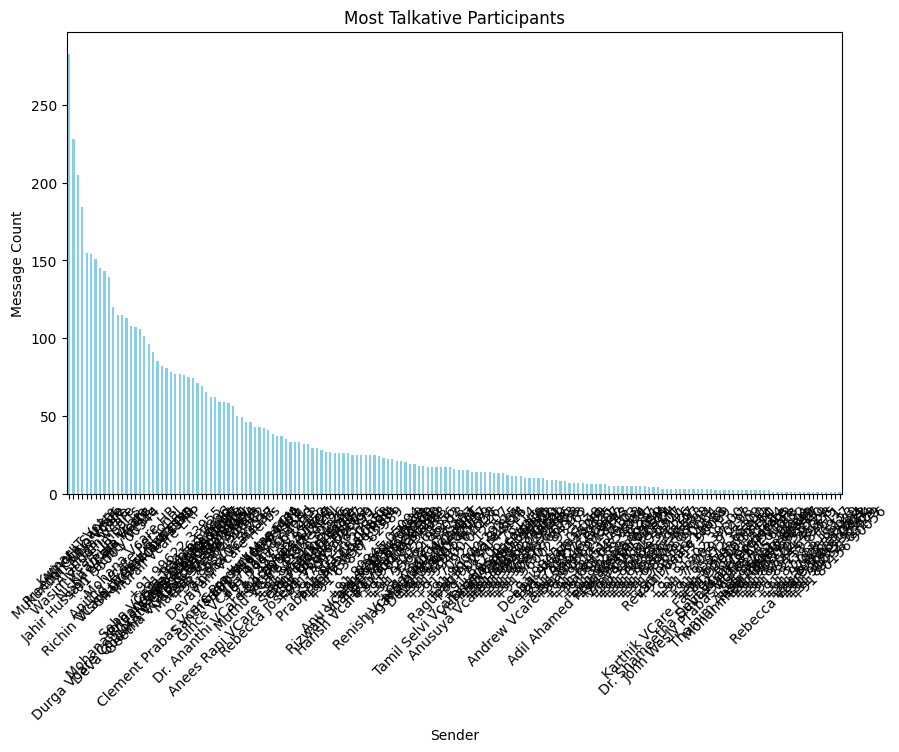

In [14]:
import pandas as pd
import re

# Read file
with open("office_group.txt", "r", encoding="utf8") as file:
    lines = file.readlines()

# Extract Date, Time, Sender, and Message using regex
data = []
pattern = r"(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}\s?(?:AM|PM)?) - (.+?): (.+)"

for line in lines:
    match = re.match(pattern, line)
    if match:
        date, time, sender, message = match.groups()
        data.append([date, time, sender, message])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Date", "Time", "Sender", "Message"])

# Check DataFrame structure
print(df.head())

# Now count messages per sender
talkative_counts = df['Sender'].value_counts()

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
talkative_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Sender')
plt.ylabel('Message Count')
plt.title('Most Talkative Participants')
plt.xticks(rotation=45)
plt.show()


# Most Active Time & Day

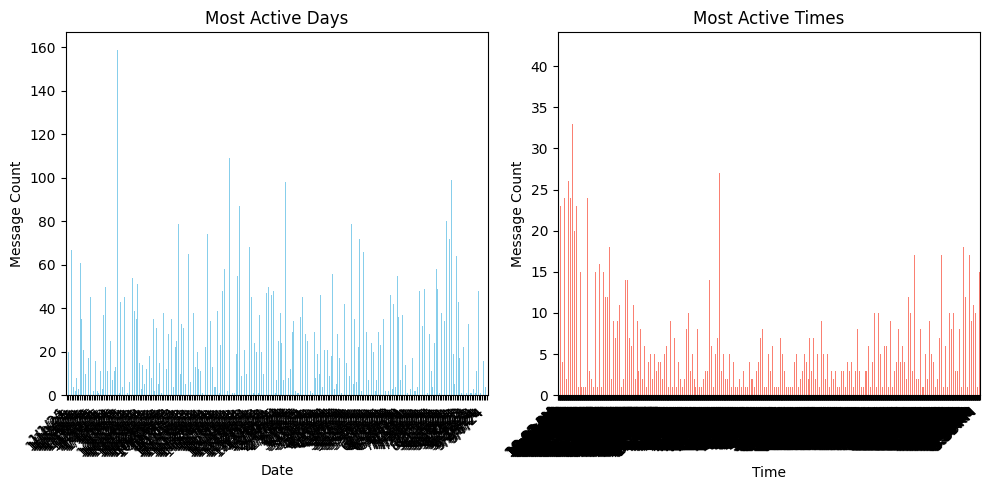

In [15]:
daily_counts = df['Date'].value_counts().sort_index()
hourly_counts = df['Time'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
daily_counts.plot(kind='bar', color='skyblue')
plt.title('Most Active Days')
plt.xlabel('Date')
plt.ylabel('Message Count')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
hourly_counts.plot(kind='bar', color='salmon')
plt.title('Most Active Times')
plt.xlabel('Time')
plt.ylabel('Message Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Media Count

In [17]:
placeholder = '<Media omitted>'

# Check the correct column name
if 'Message' in df.columns:
    media_messages = df[df['Message'].str.contains(placeholder, na=False)]
elif 'Chat' in df.columns:  # Just in case 'Chat' exists
    media_messages = df[df['Chat'].str.contains(placeholder, na=False)]
else:
    print("Error: Could not find 'Message' or 'Chat' column.")
    media_messages = None  # Avoids further errors

# Count media messages per sender if DataFrame is valid
if media_messages is not None and 'Sender' in df.columns:
    media_counts = media_messages['Sender'].value_counts()
    print(media_counts)
else:
    print("Error: Could not find the 'Sender' column.")


Sender
Preethi Clinic Vcare            68
Jahir Hussain Facility Vcare    50
Mukundan_CEO Vcare              46
Kumar IT Vcare                  45
+91 86374 43982                 41
                                ..
+91 96889 64963                  1
+91 63817 52932                  1
Harish Vcare Export Manager      1
Santhanam Vcare Vecura           1
+91 80156 90056                  1
Name: count, Length: 66, dtype: int64


# Missed Calls

In [22]:
print(df[df['Message'].str.contains("missed call", case=False, na=False)])


Empty DataFrame
Columns: [Date, Time, Sender, Message]
Index: []


In [23]:
import random
random_rows = df.sample(n=10)
print(random_rows)


          Date      Time                                     Sender  \
1809   1/14/24   6:08 PM  Durga Vcare Corporate Office Receptionist   
5588  12/18/24  10:15 AM                        Deva VCare Facility   
1406    1/3/24  10:28 AM                            +91 80746 29920   
357   10/13/23  11:26 AM                             Kiran HR Vcare   
85     9/18/23  11:07 AM                        Wasim Vcare Imports   
3788   7/26/24  11:32 AM                            +91 95518 00858   
663    11/9/23   8:13 AM                                 Raja Vcare   
4785  10/31/24   8:19 AM                            +91 95001 00544   
567    11/1/23  12:06 PM                         Mukundan_CEO Vcare   
3182   5/27/24   3:06 PM                       Vishnu VCare Systems   

                                        Message  
1809                                   Tq sir 😊  
5588                              Thank you sir  
1406   Congratulations to the entire E-com team  
357   Many more ha

In [24]:
missed_calls = df[df['Message'].str.contains("You missed a voice call", case=False, na=False)]


In [25]:
df

,Date,Time,Sender,Message
0,9/17/23,2:20 PM,+91 96000 29515,🙏🙏🙏
1,9/17/23,2:20 PM,+91 96000 29515,Many more happy returns of the day Anil 💐💐💐
2,9/17/23,2:21 PM,+91 63697 77039,Happy Birthday Anil 🥳🎉🥰
3,9/17/23,2:23 PM,+91 90429 04253,Thank you sir
4,9/17/23,2:23 PM,Kumar IT Vcare,Many more happy returns of the day Anil 💐💐💐💐🎂🎂🎂🎂
...,...,...,...,...
6014,2/6/25,2:21 PM,Vinoth Sankar,Belated Happy Birthday @917397778410
6015,2/6/25,5:18 PM,Raja Vcare,Belated Happy Birthday @⁨Dhanasekar⁩
6016,2/6/25,5:59 PM,+91 95662 86282,Thousands of thanks to all.🙏😍
6017,2/6/25,6:58 PM,Dhanasekar Vcare,Thank you sir


# Topic Modeling (TF-IDF)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf_vectorizer.fit_transform(df["Message"].dropna())
nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(dtm)
for index, topic in enumerate(nmf_model.components_):
    results = [tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(f"Topic {index+1}:", results)

topic_results = nmf_model.transform(dtm)
df["Topic"] = topic_results.argmax(axis=1)
print(df["Topic"].value_counts())


Topic 1: ['morning', 'kumar', 'congratulations', 'ok', 'thanks', 'wishes', 'tq', 'sure', 'sir', 'thank']
Topic 2: ['ott', 'needful', 'ai', 'start', 'team', 'brand', 'digital', 'social', 'media', 'omitted']
Topic 3: ['rajesh', 'muthu', 'mam', 'durga', 'kiran', 'kumar', 'gokul', 'sir', 'happy', 'birthday']
Topic 4: ['thankyou', 'nisha', 'evening', 'ok', 'thanks', 'tq', 'morning', 'good', 'noted', 'mam']
Topic 5: ['happiest', 'durga', 'leema', 'kiran', 'vishnu', 'wish', 'sir', 'happy', 'day', 'returns']
Topic
2    1851
0    1543
3    1129
4     945
1     551
Name: count, dtype: int64
